# Exploring 'Star Wars' Survey Data

## Introduction
> Star Wars is an American epic space opera multimedia franchise created by George Lucas, which began with the eponymous 1977 film and quickly became a worldwide pop-culture phenomenon. There have been multiple studies done on Star Wars-related data due to its popularity worldwide. In this project, we will analyze survey data regarding the movie series. We will explore several factors such as movie rankings, views, and character favoritism. The aim of this project is to clean the dataset and transform it into a format that is ready for analysis. We also explore the relationships between the interesting variables. The first part of this notebook will focus on cleaning and preparing the dataset for analysis. The second section will focus on exploring the different relationships between the variables.

In [1]:
# Importing the libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import math
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the dataset
star_wars = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Star Wars Survey/star_wars.csv", encoding = "ISO-8859-1")

In [3]:
for index, value in star_wars.isnull().sum().iteritems():
    print(index," : ", round((value/star_wars.shape[0])*100, 2))
    
print(star_wars.info())
star_wars.head()

RespondentID  :  0.0
Have you seen any of the 6 films in the Star Wars franchise?  :  0.0
Do you consider yourself to be a fan of the Star Wars film franchise?  :  29.51
Which of the following Star Wars films have you seen? Please select all that apply.  :  43.25
Unnamed: 4  :  51.85
Unnamed: 5  :  53.63
Unnamed: 6  :  48.82
Unnamed: 7  :  36.09
Unnamed: 8  :  37.77
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  :  29.6
Unnamed: 10  :  29.51
Unnamed: 11  :  29.6
Unnamed: 12  :  29.51
Unnamed: 13  :  29.51
Unnamed: 14  :  29.51
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  :  30.1
Unnamed: 16  :  29.93
Unnamed: 17  :  29.93
Unnamed: 18  :  30.61
Unnamed: 19  :  30.44
Unnamed: 20  :  31.37
Unnamed: 21  :  30.35
Unnamed: 22  :  30.86
Unnamed: 23  :  31.53
Unnamed: 24  :  30.27
Unnamed: 25  :  30.02
Unnamed: 26  :  30.78
Unnamed: 

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


> Before cleaning the data, let’s explore the dataset and identify areas that need cleaning. Looking at the datatypes, all the columns have been assigned the correct datatypes. The dataset has a large number of missing values, however, this is normal as we are dealing with survey data, which is bound to contain a lot of missing values. Every question is followed up with its respective answer options. There are three formatting issues with this layout: 1. The question itself is set up as a question, which is quite misleading, 2. The answer options are not described and we instead have generic names such as "Unnamed: 1" as the column header, 3. The cell value type makes it hard for us to compute mathematical operations on them. To address these issues, we will have to change the column names, map True/False values to the cell values. Throughout the dataset, we also have Yes/No values which we'll map to True/False values.

## Part 1: Cleaning The Data

In [4]:
# Converting values in "Have you seen any of the 6 films in the Star Wars franchise?" column to T/F values
# Converting values in "Do you consider yourself to be a fan of the Star Wars film franchise?" column to T/F values
mapping_dict = {"Yes" : True, "No" : False, np.nan : False}
star_wars.iloc[:, 1] = star_wars.iloc[:, 1].map(mapping_dict)
star_wars.iloc[:, 2] = star_wars.iloc[:, 2].map(mapping_dict)

In [5]:
# Cleaning the "Which of the following Star Wars films have you seen? Please select all that apply" column and its succeeding answer option columns
convert_cols = star_wars.iloc[:, 3:9].columns

for col in convert_cols:
    star_wars[col] = star_wars[col].apply(lambda x : True if type(x) == str else False)

for i, col in enumerate(convert_cols, 1):
    star_wars.rename({col : "Q1 : seen_{}".format(i)}, axis = 1, inplace = True)

In [6]:
# Cleaning the "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." column and its succeeding answer option columns
convert_cols2 = star_wars.iloc[:, 9:15].columns

for col in convert_cols2:
    star_wars[col] = pd.to_numeric(star_wars[col], errors = "coerce")
    
for i,col in enumerate(convert_cols2, 1):
    star_wars.rename({col : "Q2 : ranking_{}".format(i)}, axis = 1, inplace = True)


In [7]:
# Cleaning the "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her" column names

characters = ["Han Solo", "Luke Skywalker", "Princess Leia Organa",
              "Anakin Skywalker", "Obi Wan Kenobi", "Emperor Palpatine",
              "Darth Vader", "Lando Calrissian", "Boba Fett", "C-3P0","R2 D2",
              "Jar Jar Binks", "Padme Amidala", "Yoda"]

for col, character in zip(star_wars.iloc[:, 15:29].columns, characters):
    star_wars.rename({col : "Q3 : {}".format(character)}, axis = 1, inplace = True)   

In [8]:
# Relabeling the values for favourabilty

mapping_dict = {"Very favorably" : "Favourable",
                "Somewhat favorably" : "Favourable",
                "Neither favorably nor unfavorably (neutral)" : "Neutral",
                "Unfamiliar (N/A)" : "Unfamiliar",
                "Somewhat unfavorably" : "Unfavourable",
                "Very unfavorably" : "Unfavourable"}

for col in star_wars.iloc[:, 15:29].columns:
    star_wars[col] = star_wars[col].map(mapping_dict)


> Now that we have cleaned the column names: listed below are the Questions for Q1, Q2, and Q3 for your reference:
> - Q1: Which of the following Star Wars films have you seen? Please select all that apply.
> - Q2: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
> - Q3: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.

## Part 2: Exploring The Data

In [9]:
# Picking the "GGPlot Style"
plt.style.use("ggplot")

In [10]:
# Cosmetics Function used throughout the graphs
def cosmetics(ax, axis):
    ax.set_facecolor("mediumseagreen")
    
    ax.grid(False)
    
    for location in ["top", "bottom", "left", "right"]:
        ax.spines[location].set_visible(False)
        
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    if axis == "both":
        ax.set_yticks([])
        ax.set_xticks([])
    if axis == "x":
        ax.set_xticks([])
    if axis == "y":
        ax.set_yticks([])

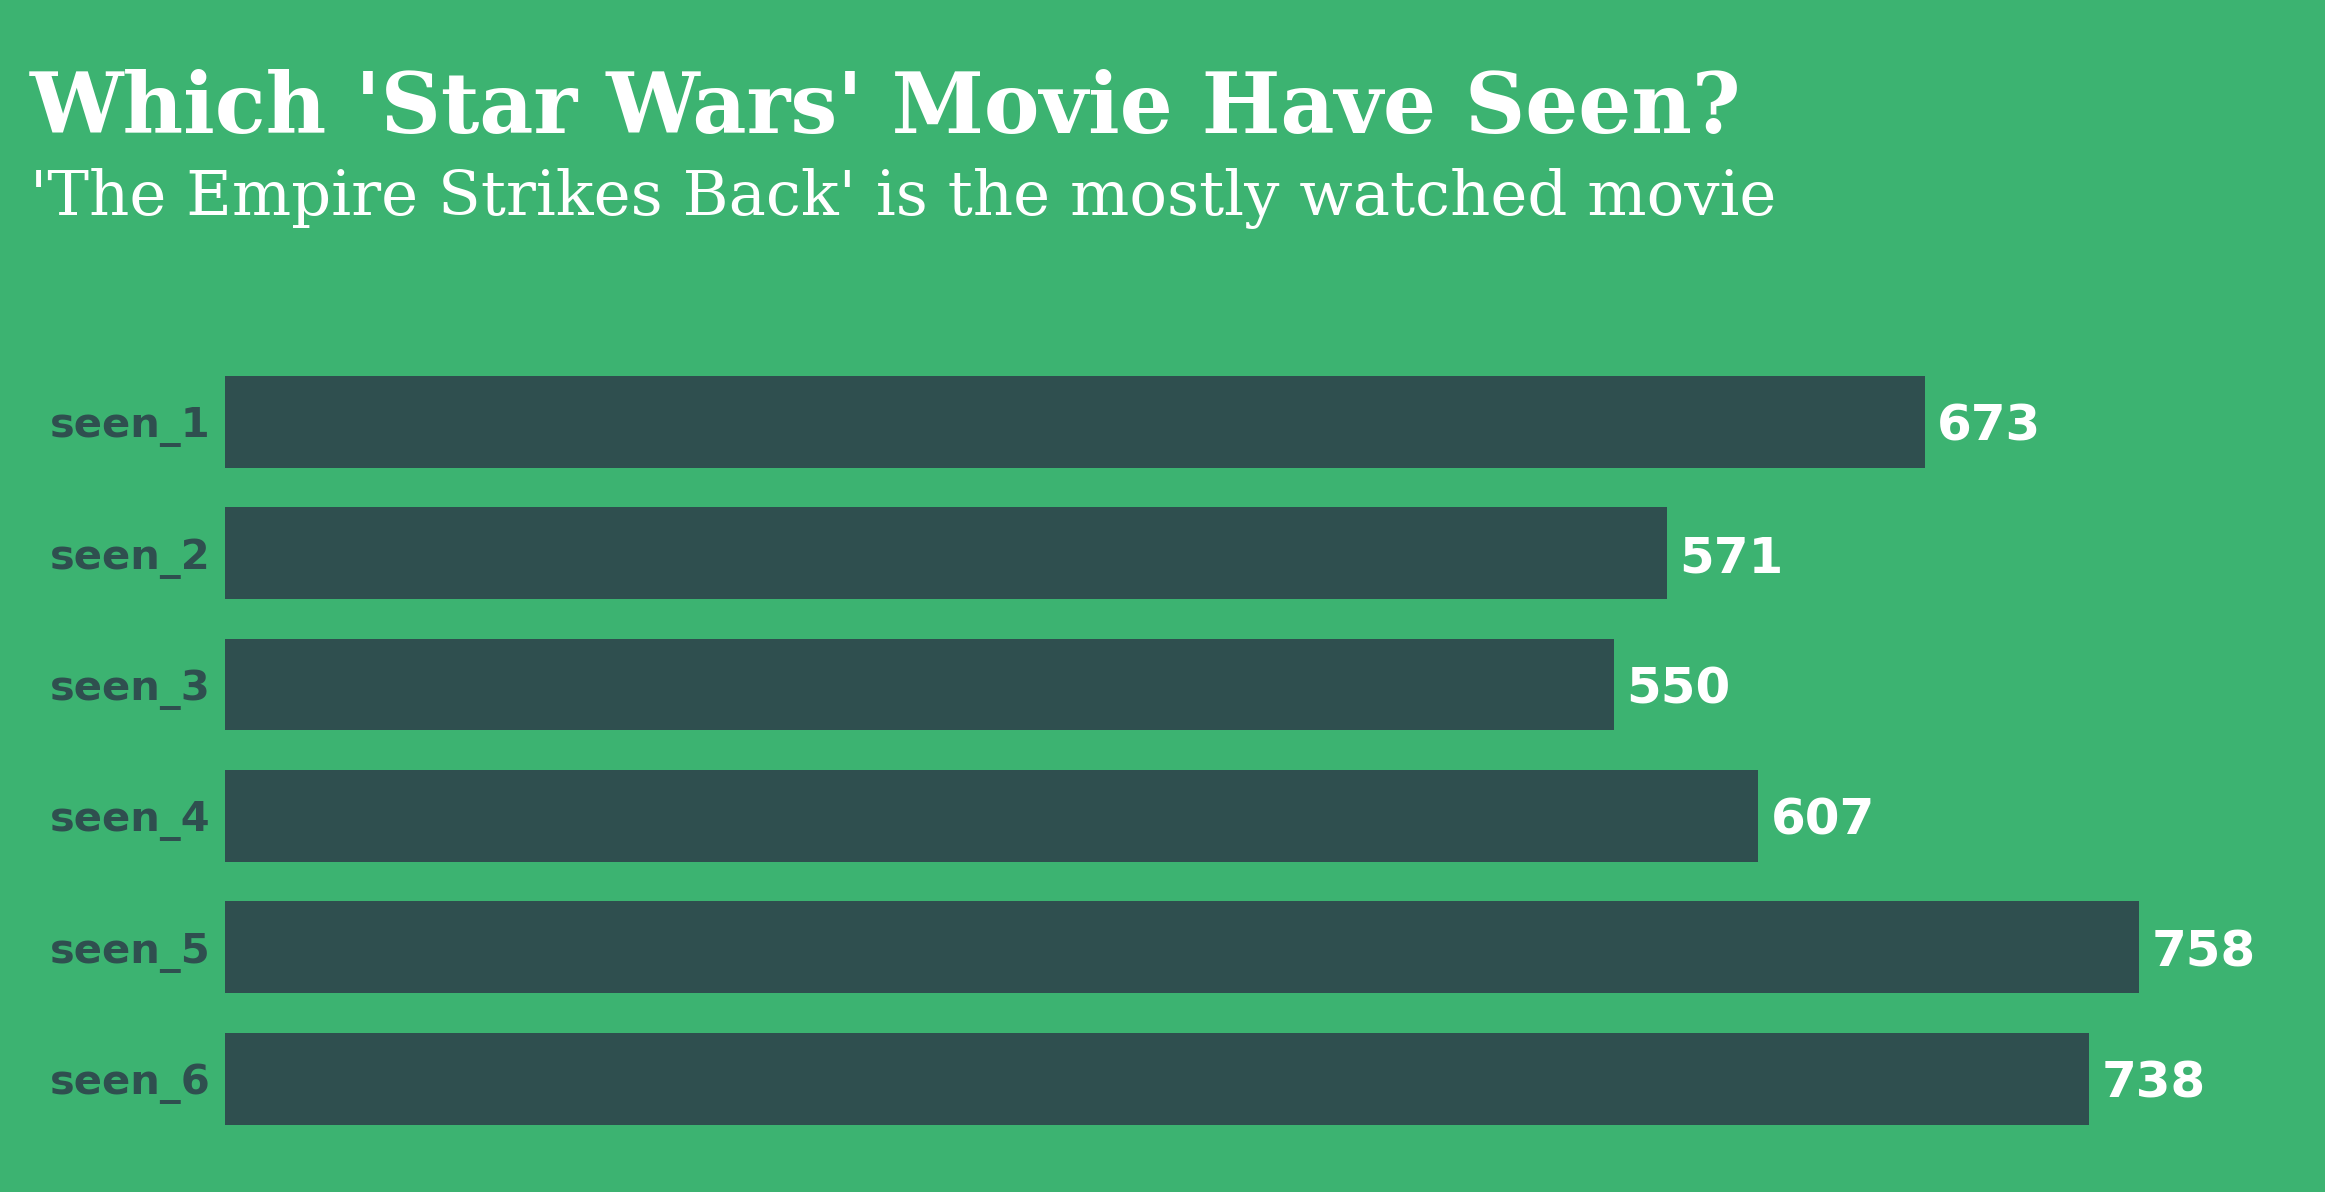

In [11]:
# Which "Star Wars" Movies Have You Seen?
fig1 = plt.figure(figsize = (10, 5))
gs1 = gs.GridSpec(nrows = 2, ncols = 1, height_ratios = ([1, 4]))

# ax1 - Title
ax1 = plt.subplot(gs1[0,0])
ax1.text(x = 0, y = 0.5, s = "Which 'Star Wars' Movie Have Seen?", color = "white", fontfamily = "serif", weight = "bold", size = 20)
ax1.text(x = 0, y = 0.1, s = "'The Empire Strikes Back' is the mostly watched movie", color = "white", fontfamily = "serif", size = 15)

# ax2 - Main Graph
ax2 = plt.subplot(gs1[1,0])
graph_data = star_wars.iloc[:, 3:9].sum()[::-1]
plt.barh(graph_data.index, graph_data, color = "darkslategrey", height = 0.7)

y_cord = -0.14
for total in graph_data:
    ax2.text(x = total + 5, y = y_cord, s = str(total), color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1

ax2.set_yticklabels(graph_data.index.map(lambda x : x.split(":")[1].strip()), size = 10, color = "darkslategrey", weight = "bold")

    
# Cosmetics
cosmetics(ax2, "x")
cosmetics(ax1, "both")
fig1.set_facecolor("mediumseagreen")

bbax1 = ax1.get_position()
bbax1.x0 = 0.145
ax1.set_position(bbax1)

bbax2 = ax2.get_position()
bbax2.x0 = 0.21
bbax2.x1 = 0.88
ax2.set_position(bbax2)

plt.show()

> As we can see the most popular "Star Wars" movie was the fifth one (which is actually the 2nd movie made as they started production with the fourth movie), title "The Empire Strikes Back". This is then followed by the sixth movie - "Return of The Jedi".Iinteresting,, the first movie (The fourth movie in the series) is one of the movies that were watched the least. Typically in a series of movies, the first one made is usually viewed the most and the viewership slowly declines as the movie series progresses.

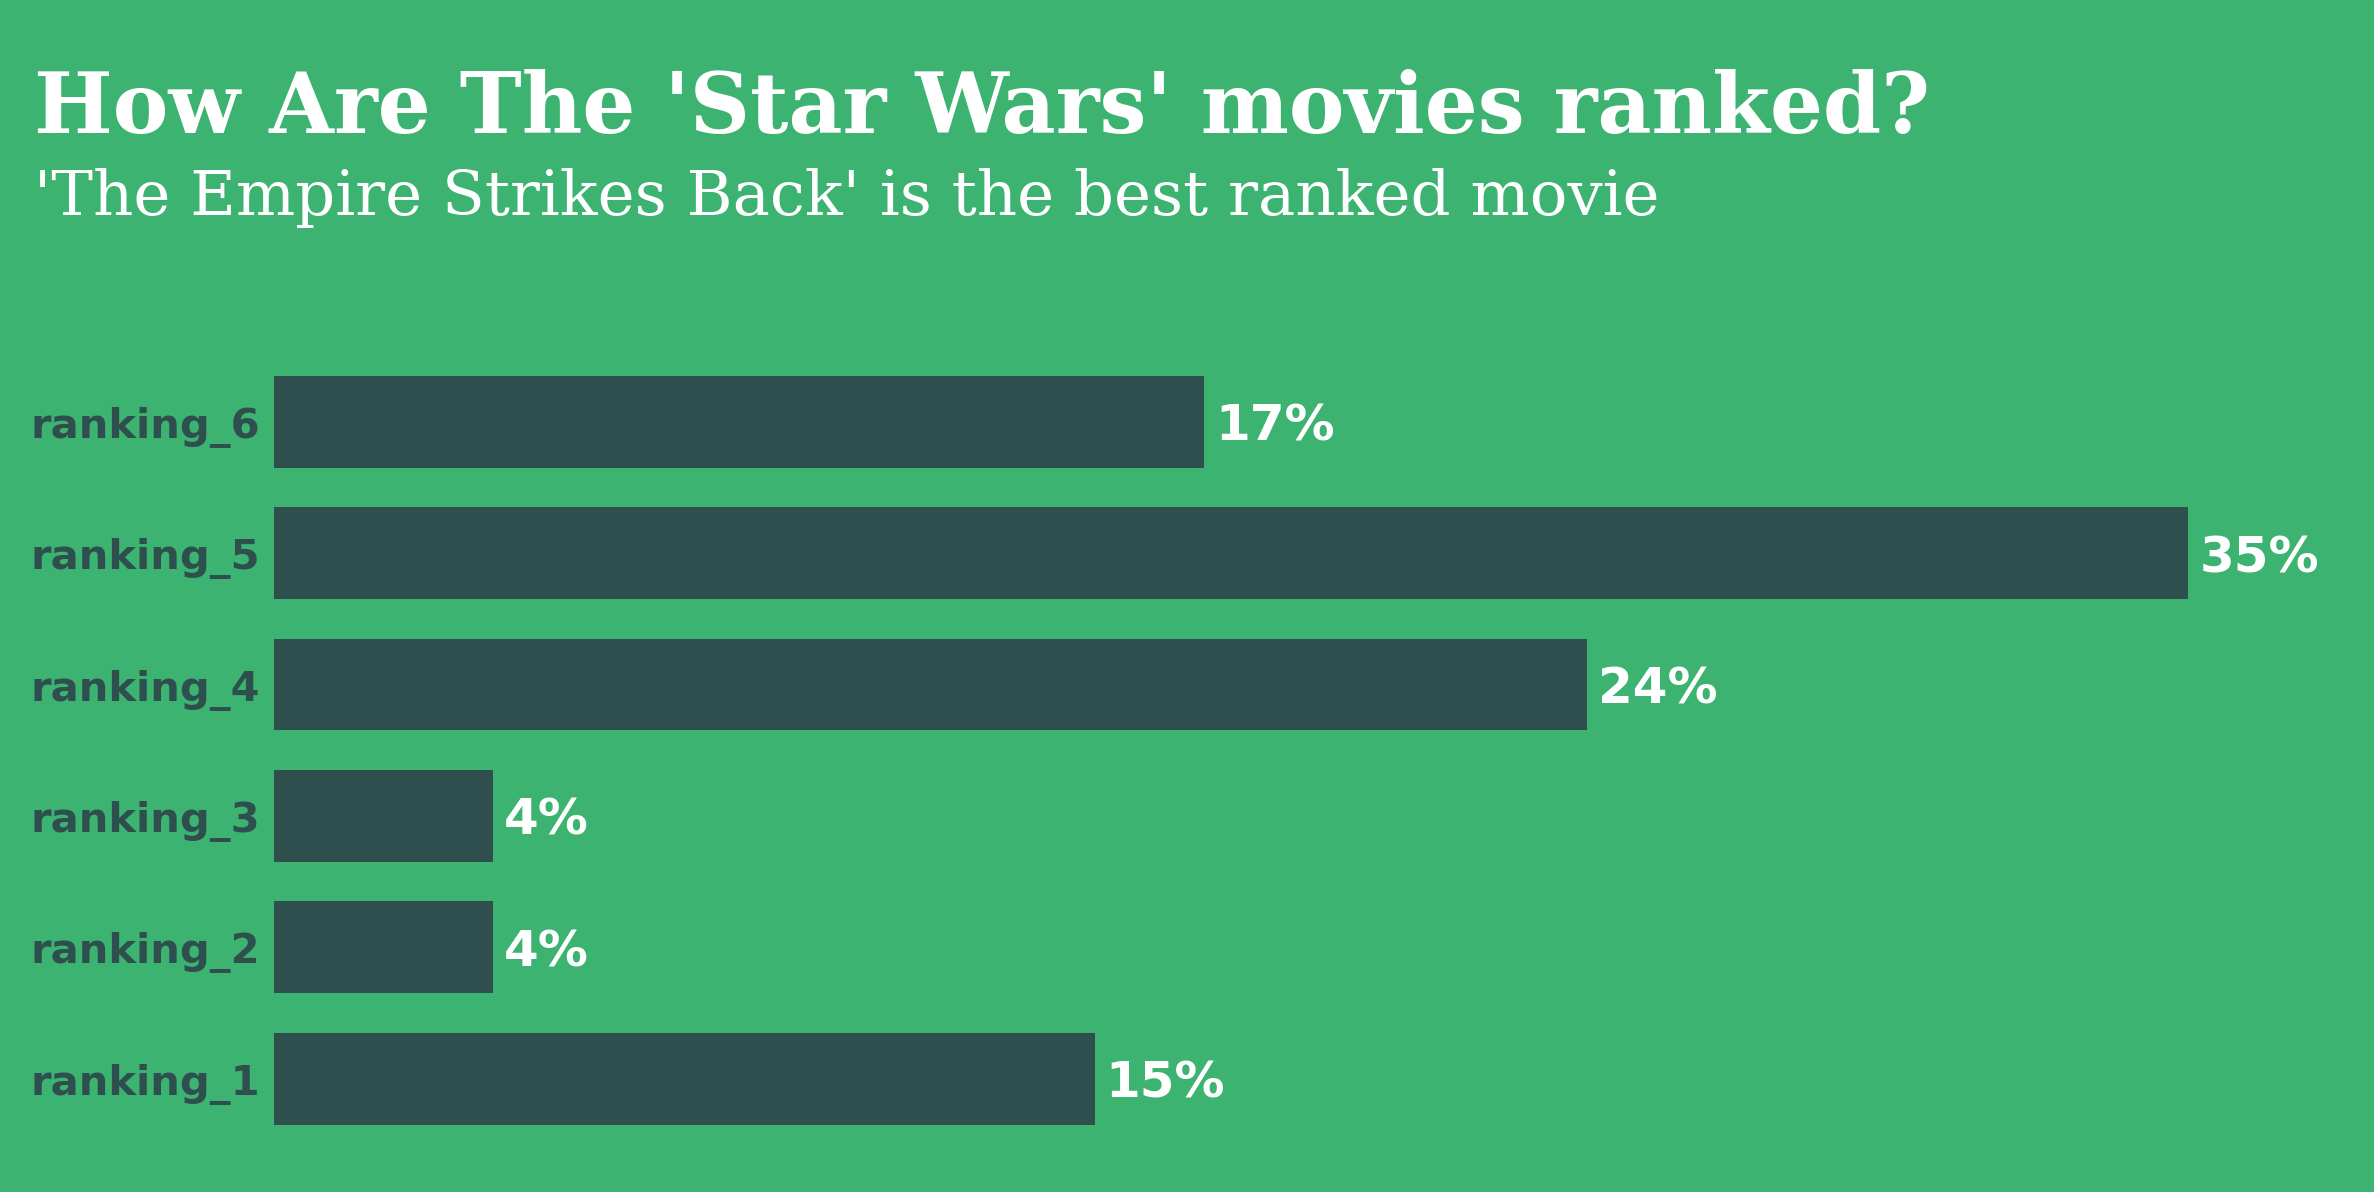

In [12]:
# How people Rate the "Star Wars" Movies?
fig2 = plt.figure(figsize = (10, 5))
gs1 = gs.GridSpec(nrows = 2, ncols = 1, height_ratios = ([1, 4]))

# ax1 - Title
ax1 = plt.subplot(gs1[0,0])
ax1.text(x = 0, y = 0.5, s = "How Are The 'Star Wars' movies ranked?", color = "white", fontfamily = "serif", weight = "bold", size = 20)
ax1.text(x = 0, y = 0.1, s = "'The Empire Strikes Back' is the best ranked movie", color = "white", fontfamily = "serif", size = 15)

# ax2 - Main Graph
favourite_movies = []

for movie in star_wars.iloc[:, 9:15].columns:
    proportion_favourite = round((star_wars[movie].value_counts()[1] / star_wars[movie].value_counts().sum()) * 100)
    favourite_movies.append(proportion_favourite)

favourite_movies = pd.Series(favourite_movies)
favourite_movies.index = star_wars.iloc[:, 9:15].columns

ax2 = plt.subplot(gs1[1,0])
plt.barh(favourite_movies.index, favourite_movies, color = "darkslategrey", height = 0.7)

y_cord = -0.14
for total in favourite_movies:
    ax2.text(x = total + 0.2, y = y_cord, s = str(total) + "%", color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1

ax2.set_yticklabels(favourite_movies.index.map(lambda x : x.split(":")[1].strip()), size = 10, color = "darkslategrey", weight = "bold")

    
# Cosmetics
cosmetics(ax2, "x")
cosmetics(ax1, "both")
fig2.set_facecolor("mediumseagreen")

bbax1 = ax1.get_position()
bbax1.x0 = 0.13
ax1.set_position(bbax1)

bbax2 = ax2.get_position()
bbax2.x0 = 0.21
bbax2.x1 = 0.88
ax2.set_position(bbax2)

plt.show()

> As we see with the results in the above graph, the 5th movie - "The Empire Strikes Back" is ranked the best compared to the rest of the movies. In general, the first 3 produced movies (movies 4, 5, and 6) are ranked higher than the prequels (movies 1, 2, and 3).

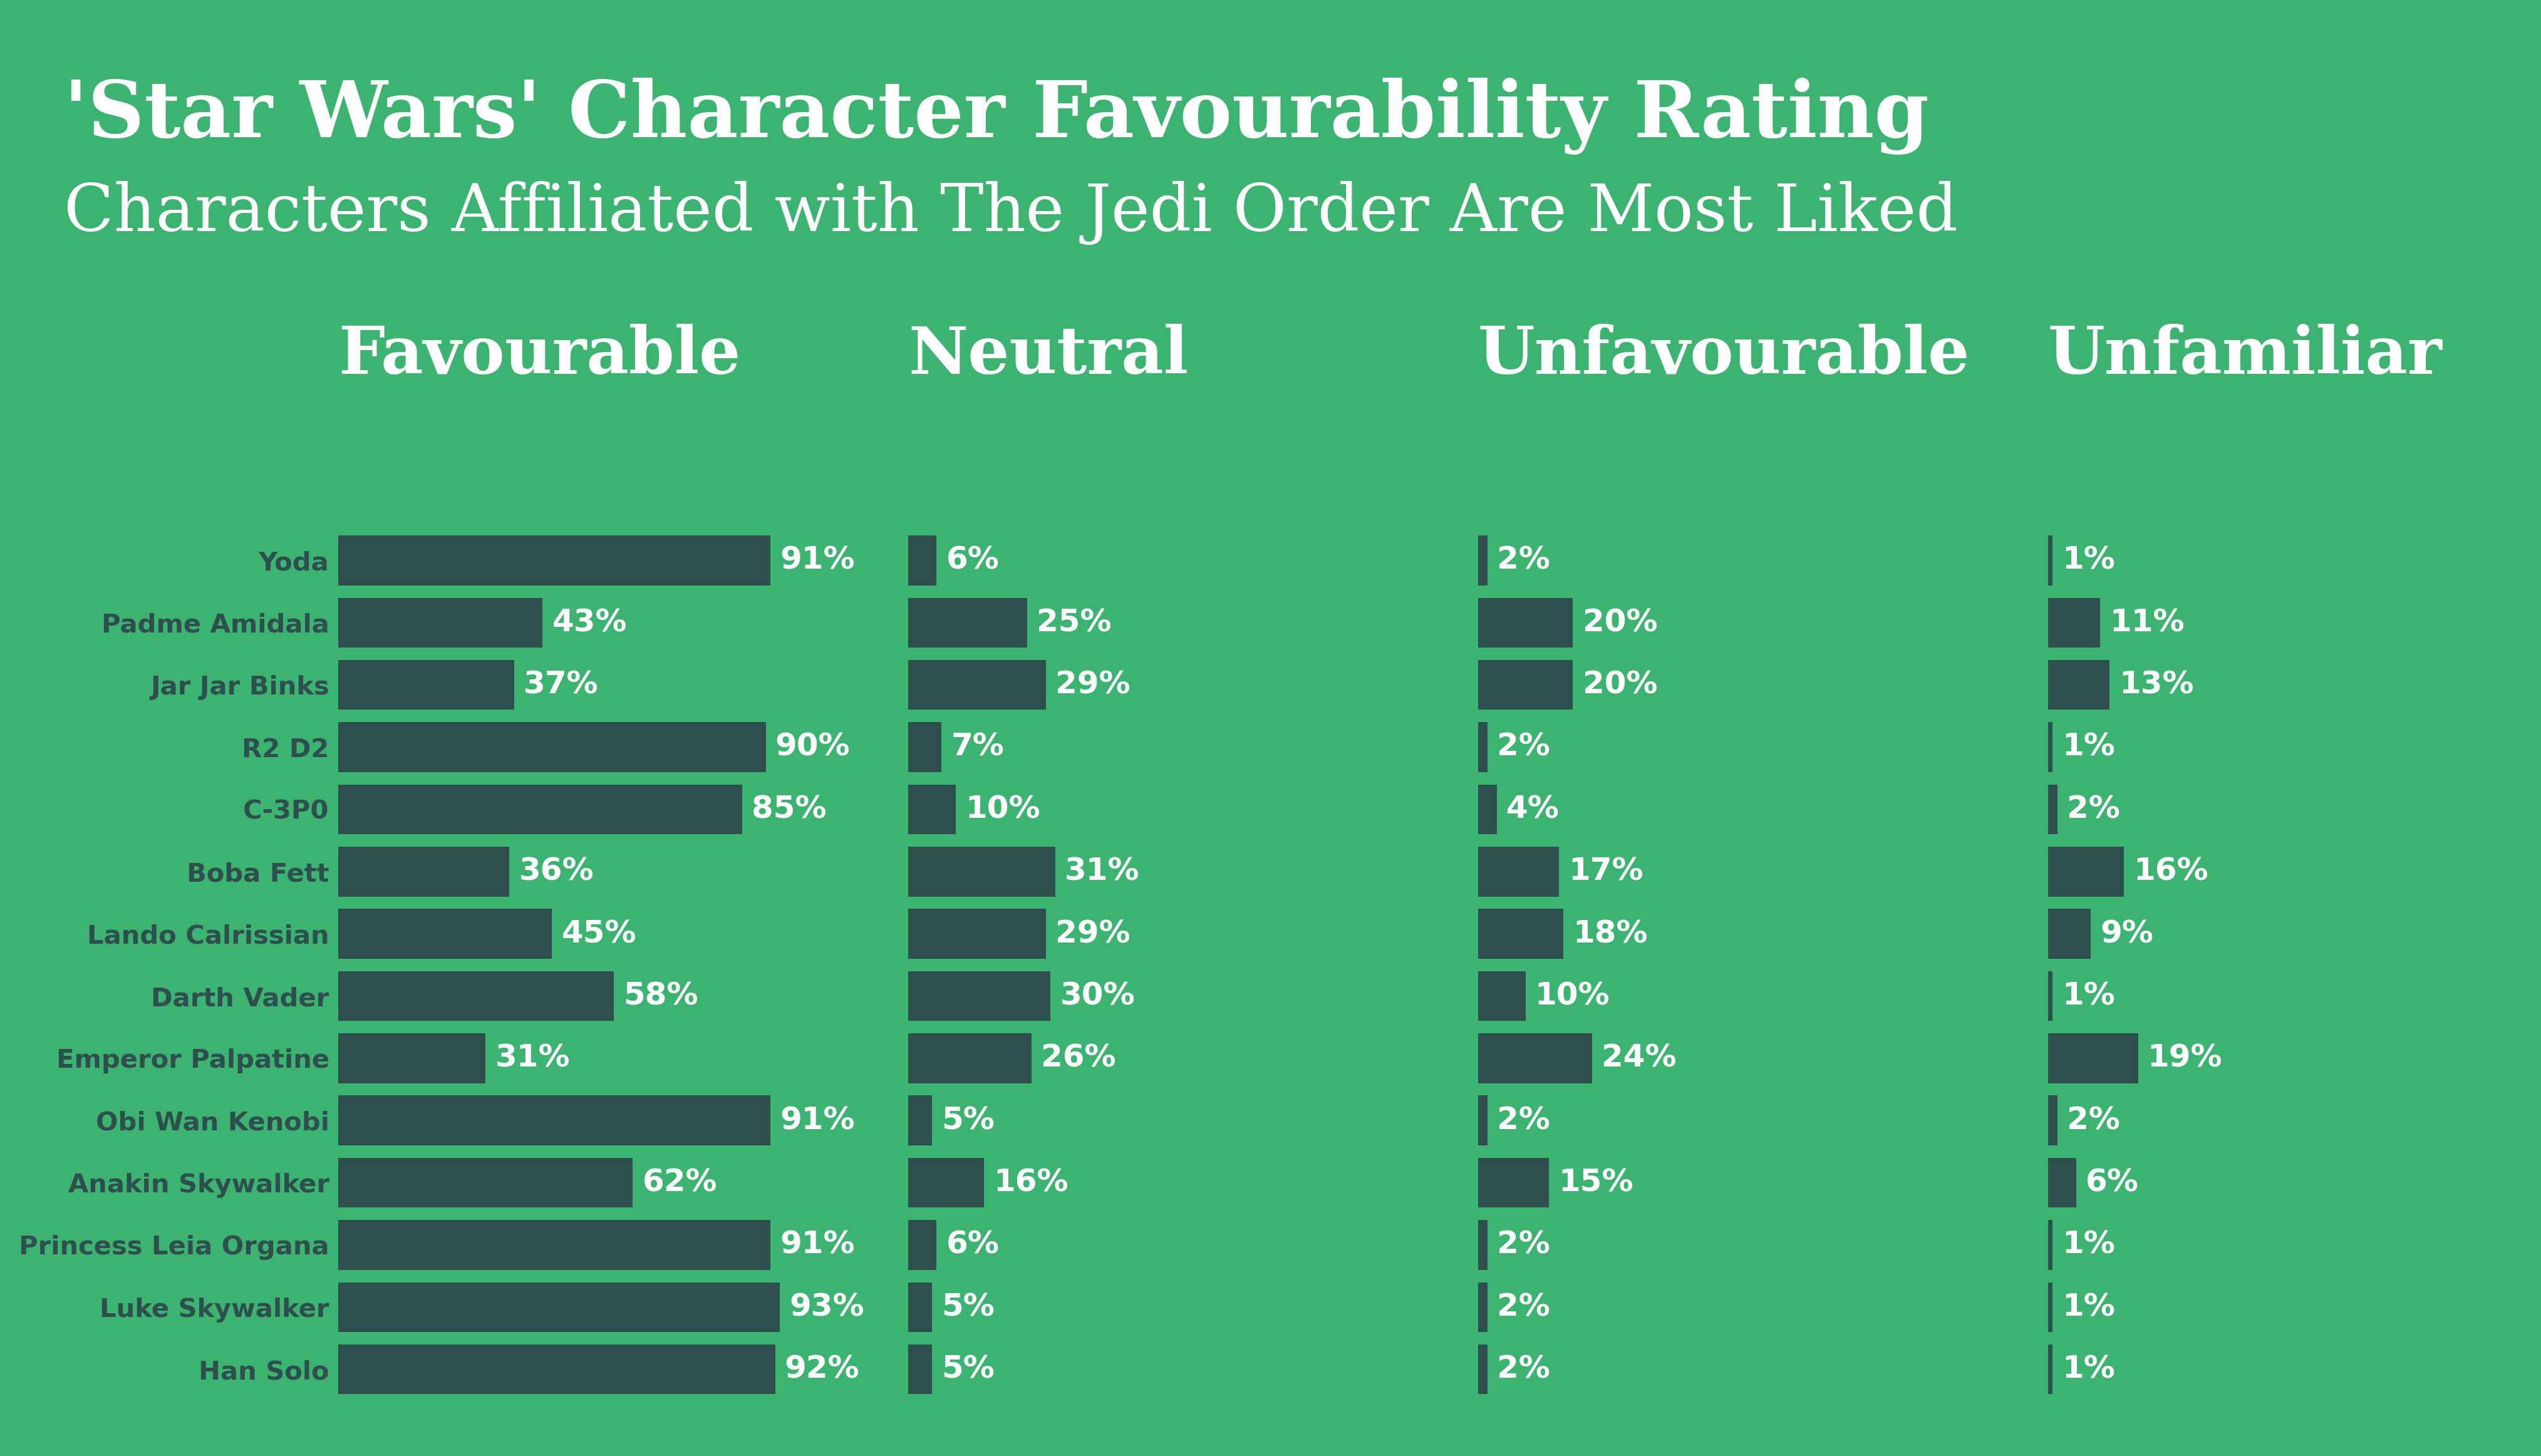

In [13]:
# "Star Wars" Character Favouriability Ratings
fig3 = plt.figure(figsize = (15, 10))
gs3 = gs.GridSpec(nrows = 3, ncols = 4, height_ratios = ([1, 0.3, 4]))

# Data for graph
final_df = pd.DataFrame()

for col in star_wars.iloc[:, 15:29].columns:
    final_df[col] = (list(round(star_wars[col].value_counts(normalize = True) * 100)))
    
final_df = final_df.T
final_df.index = final_df.index.map(lambda x : x.split(":")[1].strip())
final_df.columns = ["Favourable", "Neutral", "Unfavourable", "Unfamiliar"]

final_df

# ax1 - Title
ax1 = plt.subplot(gs3[0, :3])
ax1.text(x = -0.17, y = 0.5, s = "'Star Wars' Character Favourability Rating", color = "white", fontfamily = "serif", weight = "bold", size = 30)
ax1.text(x = -0.17, y = 0.1, s = "Characters Affiliated with The Jedi Order Are Most Liked", color = "white", fontfamily = "serif", size = 25)

# ax2  - graph 1 title
ax2 = plt.subplot(gs3[1, 0])
ax2.text(x = 0, y = 0.5, s = "Favourable", color = "white", weight = "bold", fontfamily = "serif", size = 25)

# ax3 - graph 2 title
ax3 = plt.subplot(gs3[1, 1])
ax3.text(x = 0, y = 0.5, s = "Neutral", color = "white", weight = "bold", fontfamily = "serif", size = 25)

# ax4 - graph 3 title
ax4 = plt.subplot(gs3[1, 2])
ax4.text(x = 0, y = 0.5, s = "Unfavourable", color = "white", weight = "bold", fontfamily = "serif", size = 25)

# ax5 - graph 4 title
ax5 = plt.subplot(gs3[1, 3])
ax5.text(x = 0, y = 0.5, s = "Unfamiliar", color = "white", weight = "bold", fontfamily = "serif", size = 25)

# ax6 - graph 1
ax6 = plt.subplot(gs3[2, 0])
ax6.set_xlim([0, 100])
ax6.barh(final_df.index, final_df["Favourable"], color = "darkslategrey")
y_cord = -0.14
for percent in final_df["Favourable"]:
    ax6.text(x = percent + 2, y = y_cord, s = str(int(percent)) + "%", color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1

ax6.set_yticklabels(final_df.index, size = 10, color = "darkslategrey", weight = "bold")


# ax7 - graph 2
ax7 = plt.subplot(gs3[2, 1])
ax7.set_xlim([0, 100])
ax7.barh(final_df.index, final_df["Neutral"], color = "darkslategrey")
y_cord = -0.14
for percent in final_df["Neutral"]:
    ax7.text(x = percent + 2, y = y_cord, s = str(int(percent)) + "%", color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1


# ax8 - graph 3
ax8 = plt.subplot(gs3[2, 2])
ax8.set_xlim([0, 100])
ax8.barh(final_df.index, final_df["Unfavourable"], color = "darkslategrey")
y_cord = -0.14
for percent in final_df["Unfavourable"]:
    ax8.text(x = percent + 2, y = y_cord, s = str(int(percent)) + "%", color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1


# ax9 - graph 4
ax9 = plt.subplot(gs3[2, 3])
ax9.set_xlim([0, 100])
ax9.barh(final_df.index, final_df["Unfamiliar"], color = "darkslategrey")
y_cord = -0.14
for percent in final_df["Unfamiliar"]:
    ax9.text(x = percent + 2, y = y_cord, s = str(int(percent)) + "%", color = "white", weight = "bold", ha = "left", size = 12)
    y_cord += 1

# Cosmetics
cosmetics(ax1, "both")
cosmetics(ax2, "both")
cosmetics(ax3, "both")
cosmetics(ax4, "both")
cosmetics(ax5, "both")
cosmetics(ax6, "x")
cosmetics(ax7, "both")
cosmetics(ax8, "both")
cosmetics(ax9, "both")
fig3.set_facecolor("mediumseagreen")

plt.show()


> As expected, we see that characters who were affiliated with the "Jedi" were favored over characters that were part of the "Sith". "Jar Jar Binks" was notorious for being a lazy evil character and it is no surprise he was favored the least. It is clear from these results that viewers tend to prefer the "good" guys over the "bad" guys. However, one interesting character that garnered "Neutral" opinions was "Boba Fett". Bounty hunters typically kill for a reward and I assume that "Boba Fett" was concerned with the monetary reward he would receive for killing people who had a bounty on them. For this reason, I guess he was neither on the good nor bad side and hence his popular neutral view is justified.

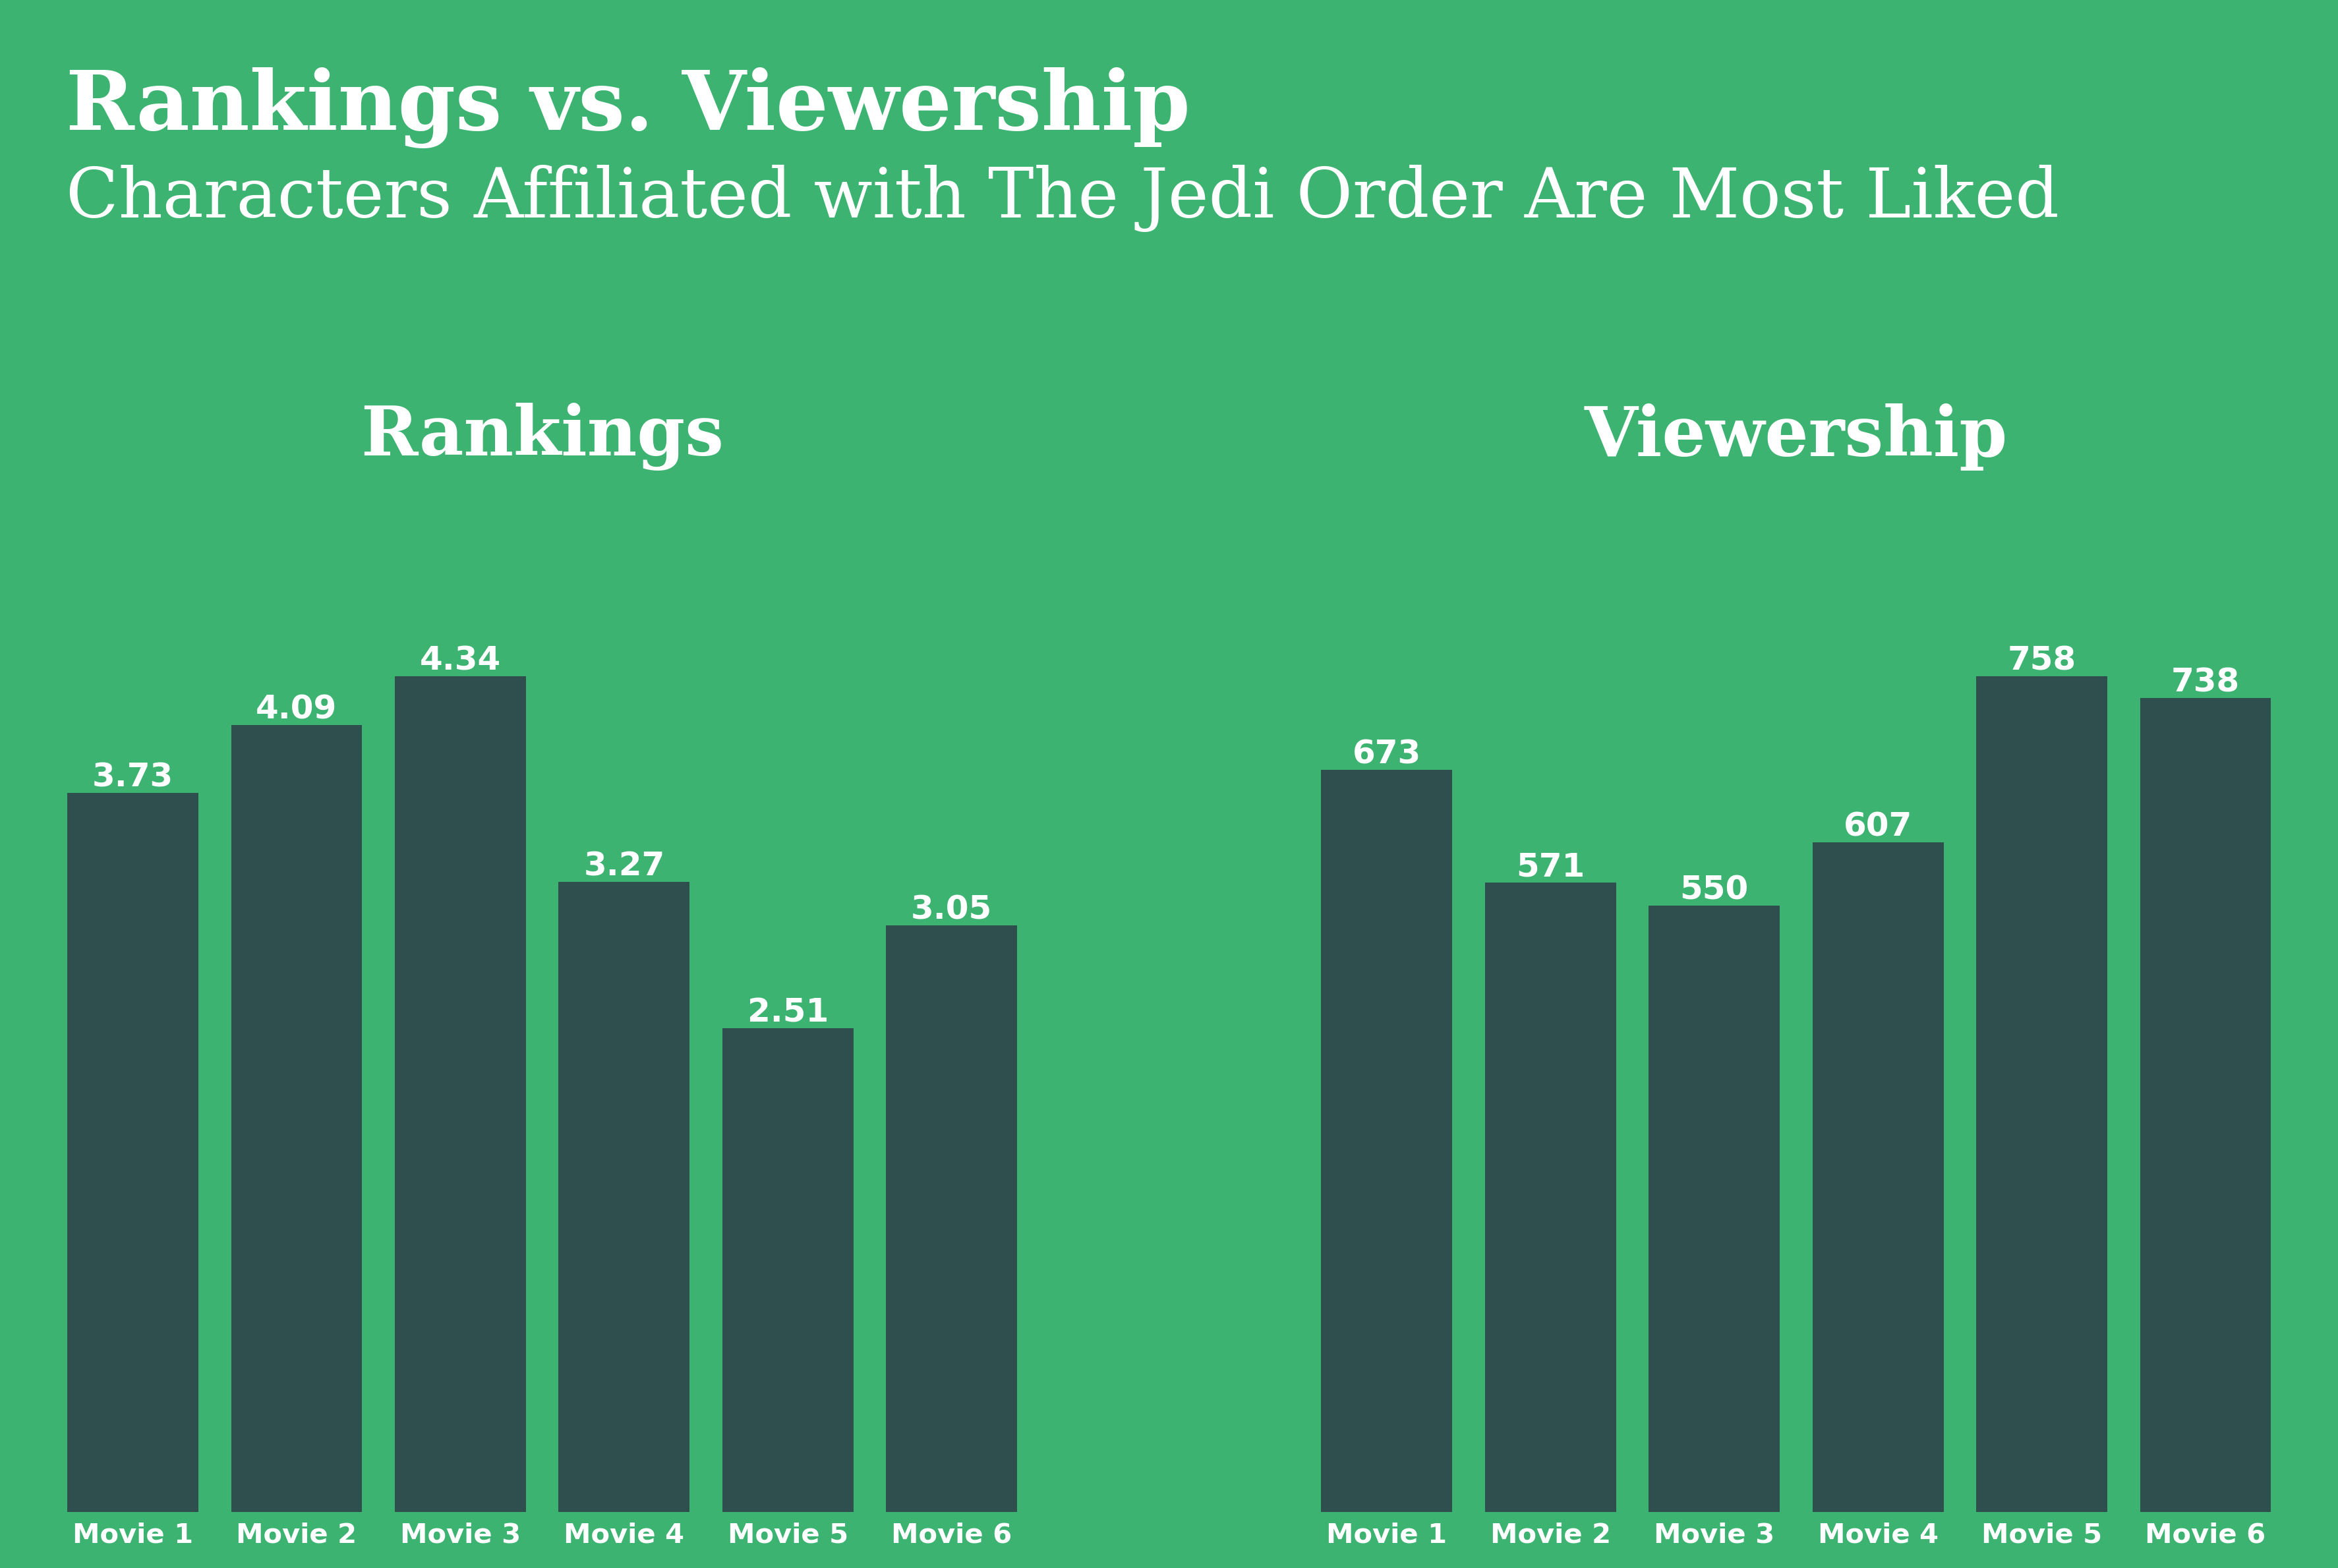

In [14]:
# Viewership vs. Ratings
rankings = star_wars.iloc[:, 9:15].mean()
viewership = star_wars.iloc[:, 3:9].sum()

fig4 = plt.figure(figsize = (15,10))
gs4 = gs.GridSpec(nrows = 3, ncols = 2, height_ratios = [1, 1, 4])

ax1 = plt.subplot(gs4[0, :2])
ax1.text(x = 0.02, y = 0.5, s = "Rankings vs. Viewership", color = "white", fontfamily = "serif", weight = "bold", size = 30)
ax1.text(x = 0.02, y = 0.1, s = "Characters Affiliated with The Jedi Order Are Most Liked", color = "white", fontfamily = "serif", size = 25)

ax2 = plt.subplot(gs4[1,0])
ax2.text(x = 0.5, y = 0.5, s = "Rankings", color = "white", ha = "center", va = "center", size = 25, weight = "bold", fontfamily = "serif")

ax3 = plt.subplot(gs4[1,1])
ax3.text(x = 0.5, y = 0.5, s = "Viewership", color = "white", ha = "center", va = "center", size = 25, weight = "bold", fontfamily = "serif")


ax4 = plt.subplot(gs4[2, 0])
ax4.bar(["Movie 1", "Movie 2", "Movie 3", "Movie 4", "Movie 5", "Movie 6"], rankings, color = "darkslategrey")

x = 0
for num in rankings:
    ax4.text(x = x, y = num , s = str(round(num, 2)), color = "white", va = "bottom", ha = "center", weight = "bold", size = 12)
    x +=1

ax4.set_xticklabels(["Movie 1", "Movie 2", "Movie 3", "Movie 4", "Movie 5", "Movie 6"], size = 10, color = "white", weight = "bold")    
    
ax5 = plt.subplot(gs4[2,1])
ax5.bar(["Movie 1", "Movie 2", "Movie 3", "Movie 4", "Movie 5", "Movie 6"], viewership, color = "darkslategrey")

x = 0
for num in viewership:
    ax5.text(x = x, y = num , s = str(round(num, 2)), color = "white", va = "bottom", ha = "center", weight = "bold", size = 12)
    x +=1

ax5.set_xticklabels(["Movie 1", "Movie 2", "Movie 3", "Movie 4", "Movie 5", "Movie 6"], size = 10, color = "white", weight = "bold")    

# Cosmetics
cosmetics(ax1, "both")
cosmetics(ax2, "both")
cosmetics(ax3, "both")
cosmetics(ax4, "y")
cosmetics(ax5, "y")
fig4.set_facecolor("mediumseagreen")

plt.show()


> A lower number for the rankings graph represents a higher ranking. The highest ranked movie and most viewed movie are both the 5th movie of the series - "The Empire Strikes Back". While the lowest-ranked movie and the least viewed movie are both the 3rd movie - "Revenge of the Sith". Interestingly, although the 4th movie was ranked quite highly, it was one of the least viewed of the 6.

## Conclusion
> It is clear to see that the 5th Movie - "The Empire Strikes Back" is a fan favorite. It outperforms all the other movies in terms of rankings by a significant margin. 35% of all respondents ranked it as the best of the 6 movies. This might not seem like a big proportion, however, the 4th movie places second with 27%. It is interesting to see that the second most successful movie (in terms of proportion of people who ranked it first) was only viewed 607 times - the 3rd least viewed movie of the series. Amongst all the characters, "Han Solo", "Luke Skywalker", "Princess Leia Organa", "Obi-Wan Kenobi", "R2 D2", and "Yoda" are all roughly equally liked with at least 90% of viewers labeling them as "favorable" characters. It seems as though viewers prefer members of the "Jedi" (good people) over members of the "Sith" (bad people).

In [15]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>